# Finding outliers using IQR
Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than $Q1 - 1.5 * IQR$ or greater than $Q3 + 1.5 * IQR$, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

Diagram of a box plot showing median, quartiles, and outliers.
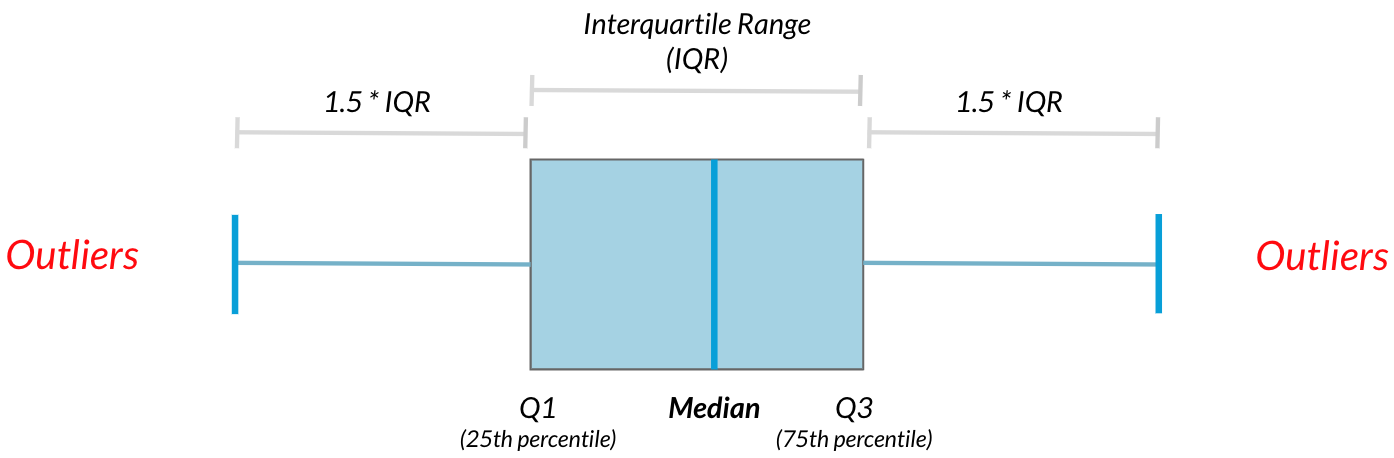
In this exercise, you'll calculate IQR and use it to find some outliers. pandas as pd and numpy as np are loaded and food_consumption is available.

In [1]:
import pandas as pd
import numpy as np

food_consumption = pd.read_csv(r'datasets/food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [2]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(np.sum)

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]

outliers

country
Argentina    2172.4
Name: co2_emission, dtype: float64

Outstanding outlier detection! It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.